# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import datetime as dt
from api_keys import weather_api_key
import scipy.stats as st
from scipy.stats import linregress

In [36]:
# Getting the current date (to include it in graph labels)
Date = dt.datetime.today().strftime("%d/%m/%Y")
Date

'18/04/2022'

In [37]:
#Import City Data
city_data = "worldcities.csv"
city_data_path = "city_data/worldcities.csv"
city_data = pd.read_csv(city_data_path)

# Set URL base variables
url = "https://api.openweathermap.org/data/2.5/weather?"
weather_api_key = weather_api_key
units = "metric"

# build partial url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
# Create a sample of 1000 cities (random) to create a pool of the 46,832 cities
city_data_sample = city_data.sample(1000)
cities = city_data_sample["City"]

# set up lists to hold reponse info
city_name = []
country = []
latitude = []
longitude = []
current_temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
foundcitycount = []

# Loop through the list of cities and perform a request for data on each
foundcitycount = 0

for city in cities:
    response = requests.get(query_url + city).json()
        
    if foundcitycount <500:
       
    #try and get all the inforamtion if city is in the list
        try:
            city_name.append(response['name'])
            country.append(response['sys']['country'])
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])
            current_temp.append(response['main']['temp'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])

            # Print the detail into e various lists 
            print(f"Success! {city} was found - information added")

            # Add a counter to foundcity count
            foundcitycount = foundcitycount + 1

        except:
            # Append null values
            print(f"--FAILURE! {city} was not found - city was skipped")
            pass
    else:
        break

#### - how to exclude anything that is not in list?

Success! owatonna was found - information added
Success! talbahat was found - information added
Success! ejby was found - information added
Success! vranovice was found - information added
Success! san dona di piave was found - information added
Success! sucha beskidzka was found - information added
Success! pottendorf was found - information added
Success! saint-saulve was found - information added
Success! semey was found - information added
--FAILURE! baod was not found - city was skipped
Success! arluno was found - information added
Success! maloma was found - information added
Success! oga was found - information added
Success! ogawa was found - information added
Success! winter garden was found - information added
Success! rexburg was found - information added
Success! rathdrum was found - information added
Success! palitana was found - information added
Success! yavas was found - information added
Success! hogyesz was found - information added
Success! bujak was found - informat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Create a new dictionary with list information
weather_dict = {
    "Country": country,
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Current Temp(c)": current_temp,
    "Max Temp(c)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness": cloudiness,
    "Windspeed (mps)": windspeed
}
weather_data = pd.DataFrame(weather_dict)
# Export Data to CSV File
weather_data.to_csv("city_data\Exported City Weather Data.csv")
weather_data


,Country,City,Latitude,Longitude,Current Temp(c),Max Temp(c),Humidity (%),Cloudiness,Windspeed (mps)
0,US,Owatonna,44.0839,-93.2260,-2.34,-1.17,77,100,5.14
1,IN,Tālbahat,25.0500,78.4333,42.61,42.61,8,3,5.82
2,DK,Ejby,55.4858,12.0817,11.82,14.48,54,38,2.06
3,CZ,Vranovice,48.9660,16.6066,10.96,13.24,57,93,3.04
4,IT,San Donà di Piave,45.6317,12.5694,14.79,15.79,40,21,2.36
...,...,...,...,...,...,...,...,...,...
495,US,Levittown,40.1551,-74.8288,0.46,3.91,71,70,0.45
496,AT,Berndorf,47.9457,16.1097,7.43,9.57,53,75,3.09
497,RU,Belaya Rechka,43.4381,43.5350,19.24,19.24,43,100,3.00
498,IT,Lecco,45.8533,9.3905,14.46,16.94,41,17,1.79


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
weather_data.describe()

,Latitude,Longitude,Current Temp(c),Max Temp(c),Humidity (%),Cloudiness,Windspeed (mps)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,31.479327,9.994400,16.757840,17.377560,58.790000,54.710000,3.072520
std,21.311715,71.355112,10.188273,9.868929,25.017467,39.962431,1.840602
min,-41.286600,-173.300000,-8.840000,-8.840000,4.000000,0.000000,0.000000
25%,15.752700,-51.557175,9.675000,10.102500,40.000000,11.000000,1.677500
50%,39.677300,16.003350,14.995000,16.235000,59.500000,59.000000,2.820000
75%,47.412500,48.636525,23.750000,24.152500,80.000000,98.250000,4.120000
max,68.150000,175.700000,44.200000,44.200000,100.000000,100.000000,10.070000


In [41]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_data
humid_cities = humid_cities["Humidity (%)"] >100
humid_cities

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Humidity (%), Length: 500, dtype: bool

In [42]:
# clean_city_data = humid_cities[humid_cities["Humidity (%)"] > 60]
# clean_city_data

# #Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# ## Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

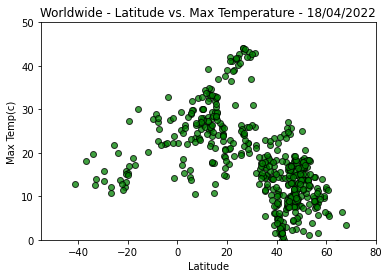

In [43]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp(c)"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Max Temp(c)")
plt.title(f"Worldwide - Latitude vs. Max Temperature - {Date}")
plt.ylim(0, 50)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Max Temperature.png");


## Latitude vs. Humidity Plot

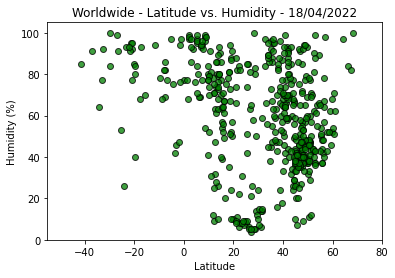

In [44]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Worldwide - Latitude vs. Humidity - {Date}")
plt.ylim(0, 105)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Humidity.png");

## Latitude vs. Cloudiness Plot

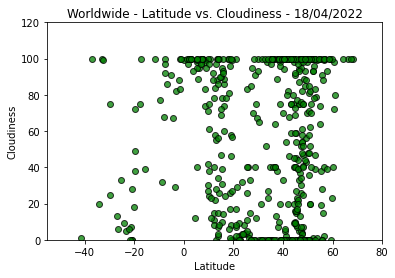

In [45]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Worldwide - Latitude vs. Cloudiness - {Date}")
plt.ylim(0, 120)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Cloudiness.png");

## Latitude vs. Wind Speed Plot

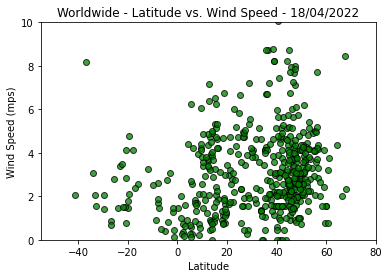

In [46]:
# Generate the plot
plt.scatter(weather_data["Latitude"], weather_data["Windspeed (mps)"], marker="o", facecolors="green", edgecolors="black", alpha=0.75)

# # Setting Plot Labels and formatting
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title(f"Worldwide - Latitude vs. Wind Speed - {Date}")
plt.ylim(0, 10)
plt.xlim(-55, 80)
plt.savefig("Images/Worldwide - Latitude vs Wind Speed.png");

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\Nino\anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Nino\anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


The correlation coefficient ('r' value) between Latitude and Max Temp in the Northern Hemisphere is -0.66


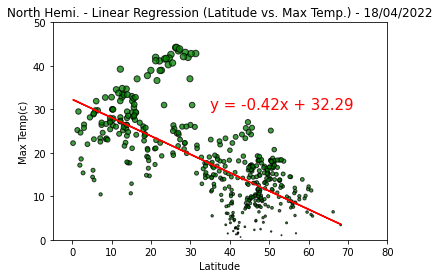

In [47]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Max Temp(c)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Max Temp(c)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp(c)")
plt.ylim(0, 50)
plt.xlim(-5, 80)
plt.annotate(line_eq,(35,30),fontsize=15,color="red")
plt.title(f"North Hemi. - Linear Regression (Latitude vs. Max Temp.) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Max Temp).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Max Temp in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Max Temp in the Southern Hemisphere is 0.65


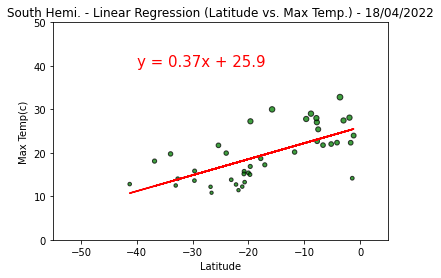

In [48]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Max Temp(c)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Max Temp(c)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp(c)")
plt.ylim(0, 50)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title(f"South Hemi. - Linear Regression (Latitude vs. Max Temp.) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Max Temp).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Max Temp in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Humidity in the Northern Hemisphere is -0.21


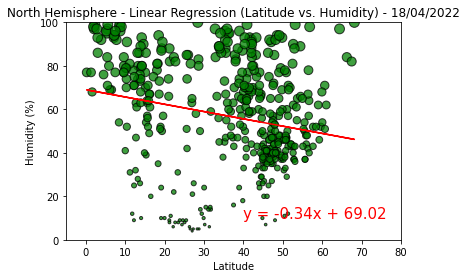

In [49]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Humidity (%)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 100)
plt.xlim(-5, 80)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title(f"North Hemisphere - Linear Regression (Latitude vs. Humidity) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Humidity).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Humidity in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Humidity in the Southern Hemisphere is -0.19


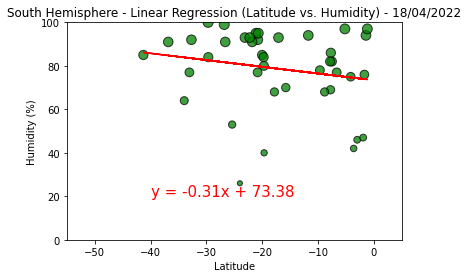

In [50]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Humidity (%)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 100)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title(f"South Hemisphere - Linear Regression (Latitude vs. Humidity) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Humidity).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Humidity in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Cloudiness in the Northern Hemisphere is -0.03


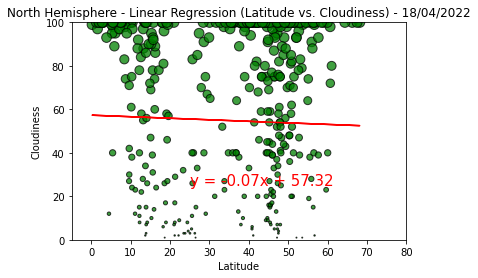

In [51]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Cloudiness"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(0, 100)
plt.xlim(-5, 80)
plt.annotate(line_eq,(25,25),fontsize=15,color="red")
plt.title(f"North Hemisphere - Linear Regression (Latitude vs. Cloudiness) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Cloudiness).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Cloudiness in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Cloudiness in the Southern Hemisphere is 0.45


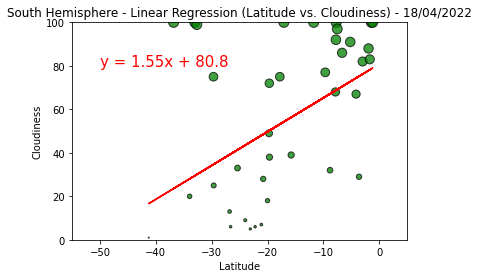

In [52]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Cloudiness"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(0, 100)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title(f"South Hemisphere - Linear Regression (Latitude vs. Cloudiness) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Cloudiness).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Cloudiness in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Wind Speed in the Northern Hemisphere is 0.16


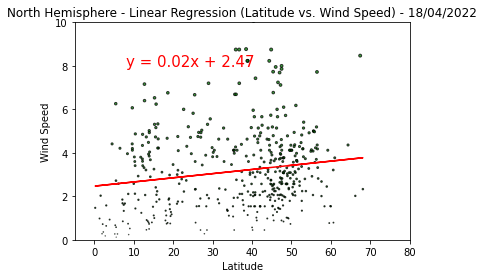

In [53]:
# Create new DF filtering only Northern Hemisphere data
north_hemi_data = weather_data[weather_data["Latitude"] >0].dropna()
north_hemi_data

# Calculate the linear regression
x_values = north_hemi_data["Latitude"]
y_values = north_hemi_data["Windspeed (mps)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=north_hemi_data["Windspeed (mps)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(0, 10)
plt.xlim(-5, 80)
plt.annotate(line_eq,(8, 8),fontsize=15,color="red")
plt.title(f"North Hemisphere - Linear Regression (Latitude vs. Wind Speed) - {Date}")
plt.savefig("Images/Northern Hemisphere - Linear Regression (Latitude vs Wind Speed).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Wind Speed in the Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient ('r' value) between Latitude and Wind Speed in the Southern Hemisphere is -0.36


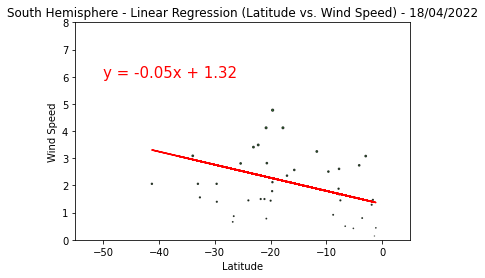

In [54]:
# Create new DF filtering only Northern Hemisphere data
south_hemi_data = weather_data[weather_data["Latitude"] <0].dropna()
south_hemi_data

# Calculate the linear regression
x_values = south_hemi_data["Latitude"]
y_values = south_hemi_data["Windspeed (mps)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black", s=south_hemi_data["Windspeed (mps)"], alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(0, 8)
plt.xlim(-55, 5)
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title(f"South Hemisphere - Linear Regression (Latitude vs. Wind Speed) - {Date}")
plt.savefig("Images/Southern Hemisphere - Linear Regression (Latitude vs Wind Speed).png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient ('r' value) between Latitude and Wind Speed in the Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")